In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import sklearn

import seaborn as sns

from sklearn.metrics import mean_absolute_error

from sklearn.model_selection import GridSearchCV

In [80]:
df = sns.load_dataset('tips')

In [81]:
df.shape

(244, 7)

In [82]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


In [84]:
df.nunique()

total_bill    229
tip           123
sex             2
smoker          2
day             4
time            2
size            6
dtype: int64

In [85]:
x = df.iloc[:,1:]
y = df.iloc[:,0]

In [86]:
x

,tip,sex,smoker,day,time,size
0,1.01,Female,No,Sun,Dinner,2
1,1.66,Male,No,Sun,Dinner,3
2,3.50,Male,No,Sun,Dinner,3
3,3.31,Male,No,Sun,Dinner,2
4,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,5.92,Male,No,Sat,Dinner,3
240,2.00,Female,Yes,Sat,Dinner,2
241,2.00,Male,Yes,Sat,Dinner,2
242,1.75,Male,No,Sat,Dinner,2


In [87]:
y

0      16.99
1      10.34
2      21.01
3      23.68
4      24.59
       ...  
239    29.03
240    27.18
241    22.67
242    17.82
243    18.78
Name: total_bill, Length: 244, dtype: float64

<AxesSubplot:xlabel='total_bill', ylabel='Count'>

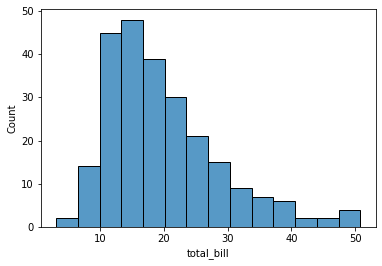

In [88]:
sns.histplot(y)

In [90]:
cat_columns = ['sex', 'smoker', 'day', 'time']

In [91]:
x= pd.get_dummies(x, columns=cat_columns, drop_first=True)

In [92]:
x

,tip,size,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
0,1.01,2,1,1,0,0,1,1
1,1.66,3,0,1,0,0,1,1
2,3.50,3,0,1,0,0,1,1
3,3.31,2,0,1,0,0,1,1
4,3.61,4,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...
239,5.92,3,0,1,0,1,0,1
240,2.00,2,1,0,0,1,0,1
241,2.00,2,0,0,0,1,0,1
242,1.75,2,0,1,0,1,0,1


In [93]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.33,random_state=42)

print('shape of x_train : ', x_train.shape)
print('shape of x_test : ', x_test.shape)
print('shape of y_train : ', y_train.shape)
print('shape of y_test : ', y_test.shape)

shape of x_train :  (163, 8)
shape of x_test :  (81, 8)
shape of y_train :  (163,)
shape of y_test :  (81,)


In [94]:
from sklearn.tree import DecisionTreeRegressor

In [95]:
tree_regressor = DecisionTreeRegressor()

tree_regressor.fit(x_train,y_train)

DecisionTreeRegressor()

In [96]:
y_predict = tree_regressor.predict(x_test)

In [97]:
print(mean_absolute_error(y_predict,y_test))

5.3372222222222225


In [98]:
from sklearn import tree

[Text(579.7231657608695, 526.6125000000001, 'X[0] <= 4.505\nmse = 80.826\nsamples = 163\nvalue = 20.121'),
 Text(383.7724184782609, 492.63750000000005, 'X[0] <= 2.695\nmse = 51.761\nsamples = 141\nvalue = 18.057'),
 Text(221.9701086956522, 458.6625, 'X[1] <= 2.5\nmse = 40.386\nsamples = 75\nvalue = 15.103'),
 Text(143.375, 424.6875, 'X[5] <= 0.5\nmse = 19.279\nsamples = 63\nvalue = 13.614'),
 Text(83.22826086956522, 390.7125, 'X[0] <= 1.005\nmse = 9.593\nsamples = 44\nvalue = 12.896'),
 Text(77.83695652173913, 356.7375, 'mse = 0.0\nsamples = 1\nvalue = 5.75'),
 Text(88.6195652173913, 356.7375, 'X[0] <= 2.015\nmse = 8.601\nsamples = 43\nvalue = 13.062'),
 Text(34.369565217391305, 322.76250000000005, 'X[0] <= 1.13\nmse = 7.946\nsamples = 30\nvalue = 12.481'),
 Text(28.97826086956522, 288.7875, 'mse = 0.0\nsamples = 1\nvalue = 16.99'),
 Text(39.76086956521739, 288.7875, 'X[0] <= 1.49\nmse = 7.494\nsamples = 29\nvalue = 12.326'),
 Text(16.17391304347826, 254.8125, 'X[6] <= 0.5\nmse = 0.302

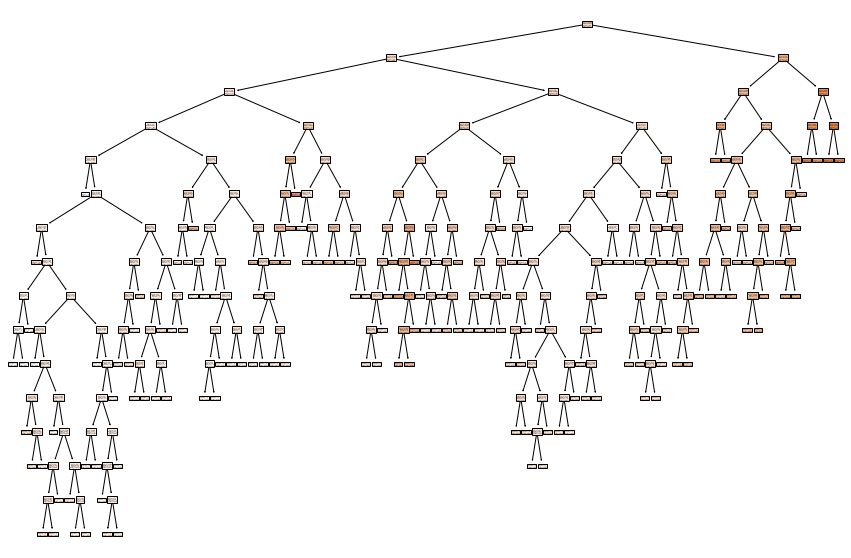

In [99]:
plt.figure(figsize=(15,10))

tree.plot_tree(tree_regressor,filled=True)

In [68]:
# hyperparameter tunning

parameters = {
    'criterion' : ["mse", "friedman_mse", "mae", "poisson"],
    'splitter' : ['best','random'],
    'max_depth' : [1,2,3,4,5],
    'max_features' : ['auto','sqrt','log2']
}

In [69]:
from sklearn.model_selection import GridSearchCV

In [72]:
tree_regressor = DecisionTreeRegressor()

reg = GridSearchCV(tree_regressor, param_grid= parameters, cv=5,scoring='accuracy')

In [73]:
reg.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'friedman_mse', 'mae', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [74]:
reg.best_params_

{'criterion': 'mse',
 'max_depth': 1,
 'max_features': 'auto',
 'splitter': 'best'}

In [78]:
y_pred = reg.predict(x_test)

print(mean_absolute_error(y_test,y_pred))

6.031532583518399
